# Exploratory Data Analysis of the Healthcare Insurance Cost Dataset

## Objectives

The purpose of this notebook is to carry out an exploratory data analysis of the Healthcare Insurance Cost dataset.

This analysis aims to:

• Understand the overall structure and key characteristics of the dataset
• Explore patterns and trends within the data
• Examine how demographic and lifestyle factors such as age, BMI, smoking status, and region relate to insurance charges
• Identify which variables appear to have the strongest association with healthcare insurance costs
• Provide insights that could support future predictive modelling




---

The dataset used in this analysis was sourced from Kaggle and was published by Willian Oliveira and Arun Jangir

# 1. Introduction and Dataset Overview

In this project, I will analyse a healthcare insurance dataset to understand how personal and geographic factors influence insurance charges. The dataset includes variables such as age, sex, BMI, number of children, smoking status, region, and medical charges.

The aim of this analysis is to explore how these features relate to insurance costs and identify meaningful patterns within the data. By carrying out exploratory data analysis and applying statistical methods, I hope to gain insights into which factors have the strongest impact on charges and why.

This project will also support the development of a predictive model that can estimate insurance costs based on individual characteristics. Before moving into deeper analysis, this notebook begins with an initial exploration of the dataset to understand its structure, data types, and overall distribution of values.

In [2]:
import pandas as pd
df = pd.read_csv("../insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Data Preparation and ETL Process

In this project, an Extract, Transform, Load approach was followed:

Extract: The dataset was loaded from a CSV file using pandas.

Transform: Data types were checked using df.info(), summary statistics were generated using df.describe(), and categorical variables were converted into numerical format using one hot encoding for modelling.

Load: The cleaned and prepared dataset was then used for exploratory analysis and predictive modelling.

This structured process ensures the dataset is suitable for statistical analysis and machine learning.

# 2. Initial Data Exploration and Data Structure

In this section, I will explore the structure and basic characteristics of the dataset. This includes examining the number of observations, identifying data types, checking for missing values, and generating summary statistics.

Understanding the structure of the dataset is an essential first step before performing deeper analysis. It ensures that the data is clean, properly formatted, and suitable for statistical testing and modelling.

In [3]:
df.shape

(1338, 7)

The dataset contains 1,338 observations and 7 variables. Each row represents one individual policyholder, while each column describes a specific characteristic such as age, BMI, smoking status or insurance charges.

With over one thousand observations, the dataset is large enough to support meaningful exploratory analysis and predictive modelling. This should allow clear patterns and relationships between personal attributes and medical charges to be identified.

---

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


The output above shows that the dataset contains 1,338 observations and 7 variables. All columns have 1,338 non-null values, which indicates that there are no missing values at this stage. This means I can proceed with the analysis without carrying out additional cleaning for null data.

From the data types, age and children are stored as integers, while bmi and charges are floating-point numbers. The variables sex, smoker, and region are stored as object types, meaning they are categorical rather than numerical. These variables will need to be converted into numerical form before applying machine learning techniques

---

In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


The summary statistics give an initial understanding of the key numerical variables in the dataset. The mean reflects the average value, while the median identifies the midpoint of the data and is particularly helpful when distributions are skewed. The standard deviation indicates how much the values vary around the mean, highlighting the level of spread within each variable.

The average age is roughly 39, with a range from 18 to 64, showing that the dataset mainly represents adults of working age. The standard deviation suggests a moderate spread in ages. The mean BMI is just above 30, placing the average individual in the overweight category, and the wide range (around 16 to 53) shows substantial variation that may influence insurance charges.

The median number of children is 1, indicating that most individuals have either no children or one child, with values ranging from 0 to 5. Insurance charges display the greatest variability. Although the mean is around 13,000, the maximum exceeds 63,000, suggesting a right skewed distribution where a small number of individuals incur significantly higher medical costs.

Overall, these descriptive statistics provide a useful foundation before moving into deeper analysis and modelling.

<Axes: >

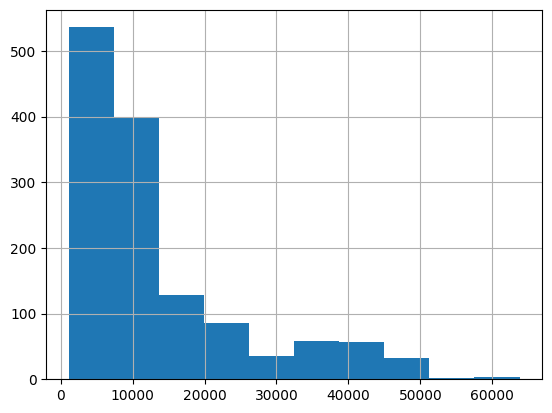

In [6]:
df['charges'].hist()

The histogram shows the distribution of insurance charges across all individuals in the dataset.

From the visualisation, it is clear that the data is not evenly distributed. Most insurance charges are concentrated in the lower range, roughly between 0 and 20,000. However, there are a smaller number of individuals with significantly higher charges, extending above 40,000 and reaching over 60,000.

This indicates that the distribution of charges is positively skewed (right-skewed), meaning that while most individuals have moderate insurance costs, a small proportion experience very high medical expenses. These extreme values may represent individuals with serious health conditions or other high-risk factors.

Understanding this distribution is important before applying statistical testing or predictive modelling, as skewed data can influence the performance of certain machine learning algorithms.

In [7]:
df.corr(numeric_only=True)


,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


The correlation matrix shows the linear relationships between the numerical variables in the dataset.

Looking at the relationship with insurance charges, age has a moderate positive correlation (approximately 0.30). This suggests that as age increases, insurance charges also tend to increase. BMI also shows a positive correlation with charges (around 0.20), although the relationship is weaker compared to age. The number of children has only a very weak positive correlation with charges (around 0.07), indicating that it does not strongly influence insurance costs on its own.

The relationships between age, BMI, and number of children are all relatively weak. This suggests that these variables are not strongly related to each other and may provide different information when building the predictive model.

Overall, age appears to have the strongest linear relationship with insurance charges among the numerical variables, followed by BMI, while children shows minimal impact.

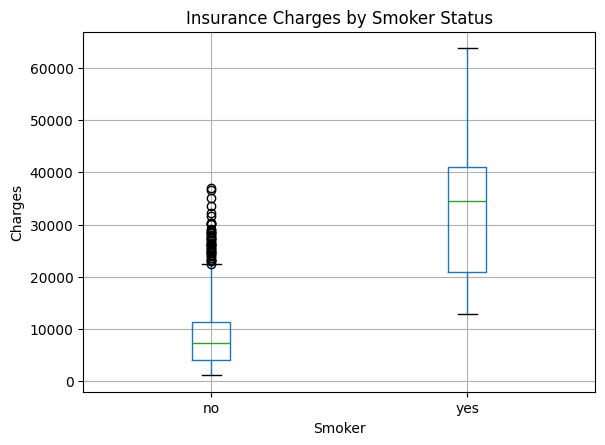

In [8]:
import matplotlib.pyplot as plt
df.boxplot(column="charges", by="smoker")
plt.title("Insurance Charges by Smoker Status")
plt.suptitle("")
plt.xlabel("Smoker")
plt.ylabel("Charges")
plt.show()

The boxplot shows a clear gap in insurance charges between smokers and non‑smokers. Overall, smokers face much higher costs, and this difference is hard to miss.

Not only is the median charge for smokers significantly higher, but their data also shows a much wider spread. This suggests that smoking has a strong impact on medical expenses. While there are a few high‑cost outliers among non‑smokers, they don’t come close to closing the gap between the two groups.

From this visual alone, smoking stands out as one of the most influential factors affecting insurance charges. It will almost certainly be an important variable when building the predictive model later in the analysis.

In [9]:
df.groupby("smoker")["charges"].mean()

smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64

The average insurance charge for non‑smokers is about 8,434, while for smokers it jumps to roughly 32,050. That’s a huge difference.

On average, smokers pay nearly four times as much as non‑smokers, which lines up with what we saw in the boxplot earlier—smokers consistently face much higher charges across the board.

This makes it clear that smoking status is one of the strongest predictors of insurance costs in this dataset. Because of this, it will be an essential variable to include when building the predictive model later in the analysis.

## 3. Hypothesis Testing: Smoker vs Non-Smoker Charges

Although the earlier analysis showed a clear difference in average insurance charges between smokers and non‑smokers, it’s important to check whether this difference is statistically meaningful rather than just due to chance.

To investigate this, an independent samples t‑test will be carried out.

The hypotheses for the test are as follows:

Null hypothesis (H₀): There is no true difference in the average insurance charges of smokers and non‑smokers; any observed gap is simply the result of random variation.

Alternative hypothesis (H₁): There is a genuine difference in the average insurance charges between the two groups.

A significance level of 0.05 will be used to decide whether the results provide enough evidence to reject the null hypothesis.

In [10]:
from scipy import stats

# Separate charges for smokers and non-smokers
smoker_charges = df[df["smoker"] == "yes"]["charges"]
non_smoker_charges = df[df["smoker"] == "no"]["charges"]

# Perform independent t-test
t_stat, p_value = stats.ttest_ind(smoker_charges, non_smoker_charges)

t_stat, p_value


(46.66492117272371, 8.271435842179102e-283)

## Interpretation of the T-Test Results

The independent samples t‑test produced a t‑statistic of about 46.66 and a p‑value that is effectively zero. Since this p‑value is far below the 0.05 significance threshold, the null hypothesis is rejected. This means the difference in average insurance charges between smokers and non‑smokers is statistically significant.

In practical terms, this result reinforces the earlier findings: smokers consistently face much higher insurance costs, and this gap is not due to random variation in the sample. Instead, it reflects a real and substantial difference between the two groups.

Overall, the test provides strong evidence that smoking status is one of the most influential factors affecting insurance charges in this dataset.

## 4. Predictive Modelling: Linear Regression

In this section, I will build a linear regression model to estimate insurance charges based on personal and demographic characteristics. 

This is a supervised learning task because the target variable, insurance charges, is known and the model is trained using labelled historical data. Linear regression was selected as an appropriate baseline algorithm because the outcome variable is continuous and the aim is to predict numerical values rather than classify categories. In addition, linear regression provides interpretable coefficients, allowing an undertanding of how each feature influence predicted insurance costs.

Before training the model, categorical variables such as sex, smoker, and region must be converted into numerical format. This ensures that the machine learning algorithm can process them correctly.

In [11]:
# Create a copy of the dataset for modelling
df_model = df.copy()

# Convert categorical variables using one-hot encoding
df_model = pd.get_dummies(df_model, drop_first=True)

df_model.head()


,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


In [12]:
# Define feature variables (independent variables)
X = df_model.drop("charges", axis=1)

# Define target variable (dependent variable)
y = df_model["charges"]

X.head()


,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,False,True,False,False,True
1,18,33.770,1,True,False,False,True,False
2,28,33.000,3,True,False,False,True,False
3,33,22.705,0,True,False,True,False,False
4,32,28.880,0,True,False,True,False,False


In [13]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape


((1070, 8), (268, 8))

In [14]:
from sklearn.linear_model import LinearRegression
import joblib
from pathlib import Path

# Create the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Save the trained model
Path("models").mkdir(exist_ok=True)
joblib.dump(model, "models/insurance_model.pkl")

# Make predictions
y_pred = model.predict(X_test)

y_pred[:5]


array([ 8969.55027444,  7068.74744287, 36858.41091155,  9454.67850053,
       26973.17345656])

In [17]:
import joblib
from pathlib import Path

# Create models folder if it doesn't exist
models_path = Path("models")
models_path.mkdir(exist_ok=True)

# Save trained model
joblib.dump(model, models_path / "insurance_model.pkl")


['models\\insurance_model.pkl']

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

mae, rmse, r2


(4181.194473753654, 5796.2846592762735, 0.7835929767120723)

## Model Evaluation

The performance of the linear regression model was evaluated using Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and R² score.

The MAE is approximately 4181, which means that on average, the model’s predictions differ from the actual insurance charges by around 4181 units. The RMSE is approximately 5796, which indicates the typical size of prediction errors, with larger errors having a greater influence due to squaring.

The R² score is approximately 0.78, meaning that around 78 percent of the variation in insurance charges is explained by the model. This suggests that the model captures a substantial portion of the relationship between the independent variables and insurance charges.

Overall, the model demonstrates reasonably strong predictive performance, although some prediction error remains, which may be influenced by factors not included in the dataset.

In [16]:
# Create a dataframe of feature importance (coefficients)
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})

coefficients.sort_values(by="Coefficient", ascending=False)

,Feature,Coefficient
4,smoker_yes,23651.128856
2,children,425.278784
1,bmi,337.092552
0,age,256.975706
3,sex_male,-18.591692
5,region_northwest,-370.677326
6,region_southeast,-657.864297
7,region_southwest,-809.799354


## Interpretation of Model Coefficients

The table above presents the coefficients from the linear regression model, showing how each variable influences predicted insurance charges while the other variables are held constant.

Smoking status stands out as the most impactful factor. The coefficient for smoker_yes is roughly 23,651, meaning that being a smoker increases predicted insurance charges by about this amount compared to a non‑smoker, assuming all other variables remain the same. This aligns with the earlier exploratory findings and the t‑test results, both of which showed that smokers face substantially higher costs.

Age, BMI, and number of children also have positive coefficients, indicating that increases in these variables are associated with higher predicted charges. However, their effects are much smaller than the impact of smoking.

The coefficient for sex is slightly negative, suggesting only a minimal difference between males and females once other factors are controlled for.

The regional coefficients are negative relative to the baseline region, meaning that predicted charges in those areas are slightly lower than in the reference category.

Overall, the model reinforces that smoking status is the strongest predictor of insurance charges, with age and BMI following behind.

## Modelling Conclusion

The linear regression model achieved an R² score of approximately 0.78. This means that around 78 percent of the variation in insurance charges can be explained by the variables included in the model. This indicates a strong overall fit for a baseline regression model.

The Mean Absolute Error (MAE) is approximately 4,181, meaning that on average, the model’s predictions differ from the actual insurance charges by about 4,181. The Root Mean Squared Error (RMSE) is approximately 5,796, which further reflects the typical size of prediction errors.

Overall, the model performs well and confirms that smoking status is the most influential factor affecting insurance charges. While the model captures a large portion of the variation in the data, there is still some unexplained variance, suggesting that additional factors or more complex models could potentially improve prediction accuracy.

This supervised machine learning implementation demontrates the application of an appropriate predictive algorithm to address a defined analytical problem, namely estimating healthcare insurance charges using demographic and lifestyle variables.